# Parameter estimation

This notebook shows how to use the Dottermodel to take the following steps:

1. Load an example geometry (the 'Grote Beek')
2. Visually examine system
3. Run an uncalibrated modelrun and check output
4. Auto-calibrate the roughness coefficient and check output

First, we import the *Dottermodel* class and the *tools* library:

In [1]:
%matplotlib notebook
from dotter.models import DotterModel
from dotter import tools

### Loading and inspecting model

For this example we are going to load an example case study.

In [2]:
deltabeek = DotterModel('../cases/grotebeek/config.ini')

2018-04-19 16:00:01 - utils.py - INFO - Start logging to dotter.log
2018-04-19 16:00:01 - models.py - INFO - Loading configuration file ../cases/grotebeek/config.ini
2018-04-19 16:00:01 - models.py - DEBUG - datetimefmt: %d/%m/%Y
2018-04-19 16:00:01 - models.py - DEBUG - timeformat set to %d/%m/%Y
2018-04-19 16:00:01 - models.py - INFO - Loading geometry from ../cases/grotebeek\GroteBeek.xlsx
2018-04-19 16:00:02 - containers.py - DEBUG - number of timesteps: 106
2018-04-19 16:00:02 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-04-19 16:00:02 - containers.py - DEBUG - top time: 2016-07-31 00:00:00
2018-04-19 16:00:02 - containers.py - DEBUG - using spatial step of 40.0 m
2018-04-19 16:00:03 - models.py - INFO - Loading boundary conditions
2018-04-19 16:00:03 - containers.py - INFO - interpolating boundaries to grid
2018-04-19 16:00:03 - containers.py - DEBUG - Lateral Lat_1 inserted at chainage 150
2018-04-19 16:00:03 - containers.py - DEBUG - Lateral Lat_2 inserted at 

This example already contains measurements. Let's see what the model looks like:

<IPython.core.display.Javascript object>


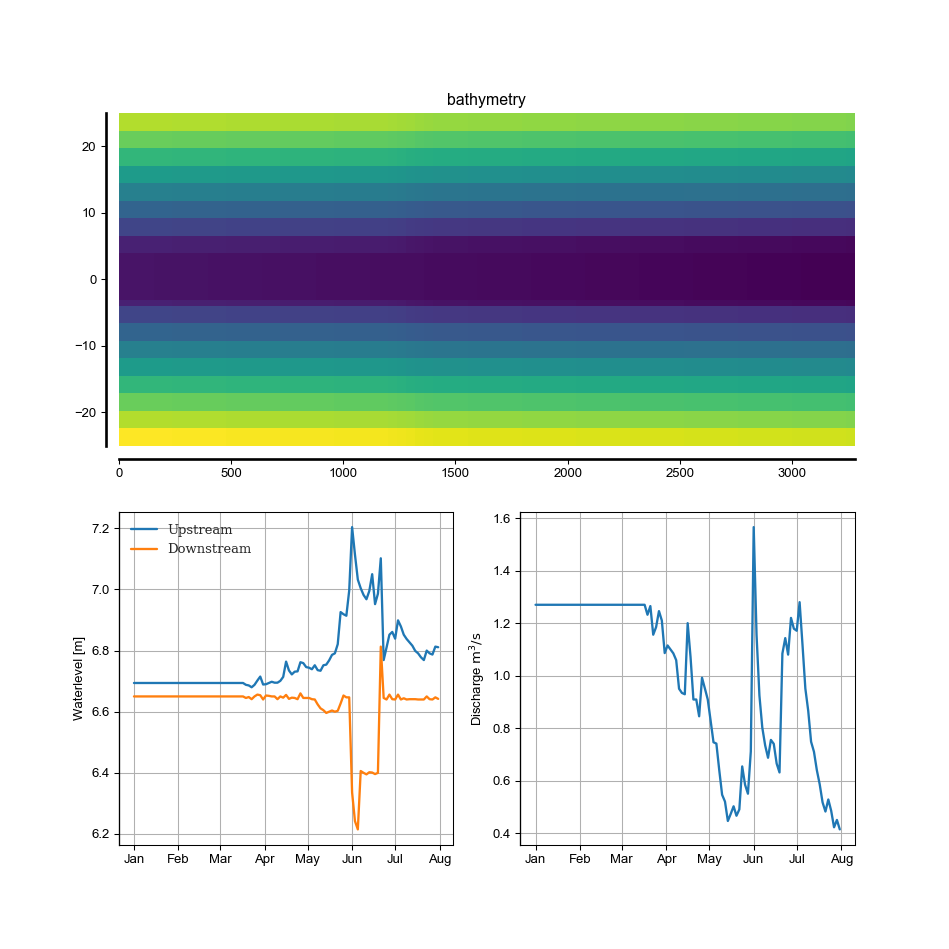

2018-04-19 16:00:20 - models.py - INFO - Figures saved to ../cases/grotebeek\output\dash_1.png


<IPython.core.display.Javascript object>


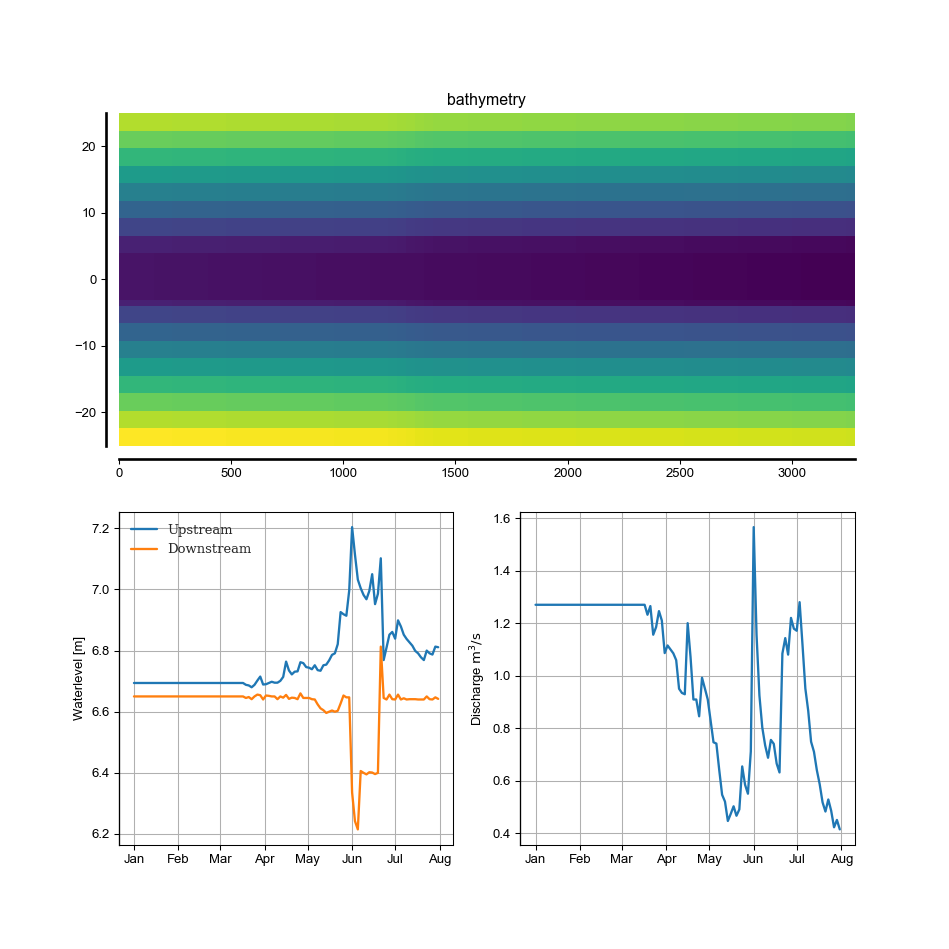

In [3]:
deltabeek.dash(show=True)

Run the model

2018-04-19 16:00:42 - models.py - INFO - start model run
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:02<00:00, 43.44it/s]
2018-04-19 16:00:44 - models.py - INFO - Written waterlevel to ../cases/grotebeek\output\waterlevel.csv
2018-04-19 16:00:45 - models.py - INFO - Written waterdepth to ../cases/grotebeek\output\waterdepth.csv
2018-04-19 16:00:45 - models.py - INFO - Written friction to ../cases/grotebeek\output\friction.csv
2018-04-19 16:00:45 - models.py - INFO - Written blockage to ../cases/grotebeek\output\blockage.csv


<IPython.core.display.Javascript object>


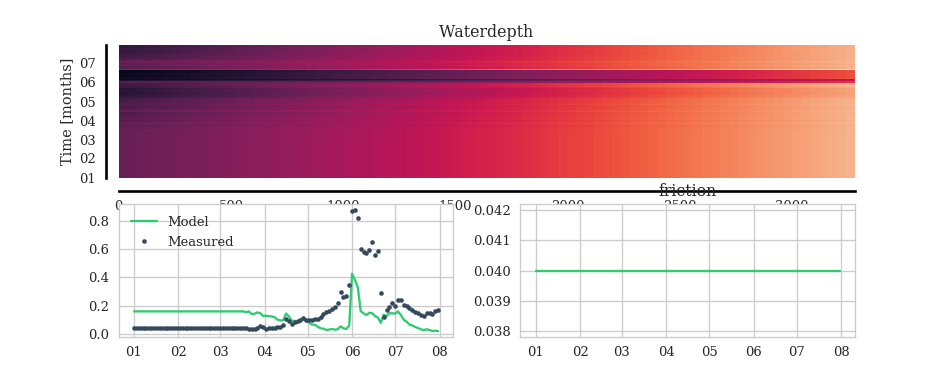

2018-04-19 16:00:46 - models.py - INFO - Figures saved to ../cases/grotebeek\output\dash_2.png


<IPython.core.display.Javascript object>


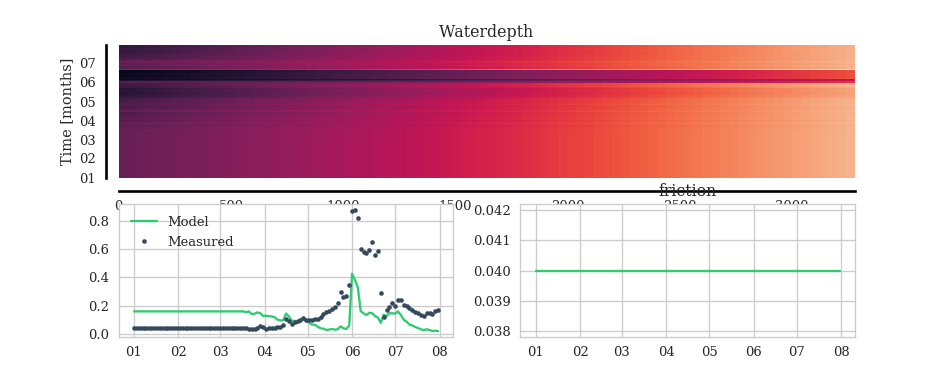

In [4]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We see that model and measurement do not really compare well. To fix that, we can calibrate the model. To do this, we are going to use the tools library:

In [5]:
tools.estimate_roughness(deltabeek, every=1)

2018-04-19 16:00:58 - tools.py - INFO - Optimising model-wide roughness factor
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:52<00:00,  2.04it/s]


,0.0,40.0,80.0,120.0,160.0,200.0,240.0,280.0,320.0,360.0,...,2920.0,2960.0,3000.0,3040.0,3080.0,3120.0,3160.0,3200.0,3240.0,3280.0
2016-01-01,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-03,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-05,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-07,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-09,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-11,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-13,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-15,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-17,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125
2016-01-19,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,...,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125,0.019125


The model already set friciton

2018-04-19 16:02:06 - models.py - INFO - start model run
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:02<00:00, 44.44it/s]
2018-04-19 16:02:09 - models.py - INFO - Written waterlevel to ../cases/grotebeek\output\waterlevel.csv
2018-04-19 16:02:09 - models.py - INFO - Written waterdepth to ../cases/grotebeek\output\waterdepth.csv
2018-04-19 16:02:09 - models.py - INFO - Written friction to ../cases/grotebeek\output\friction.csv
2018-04-19 16:02:09 - models.py - INFO - Written blockage to ../cases/grotebeek\output\blockage.csv


<IPython.core.display.Javascript object>


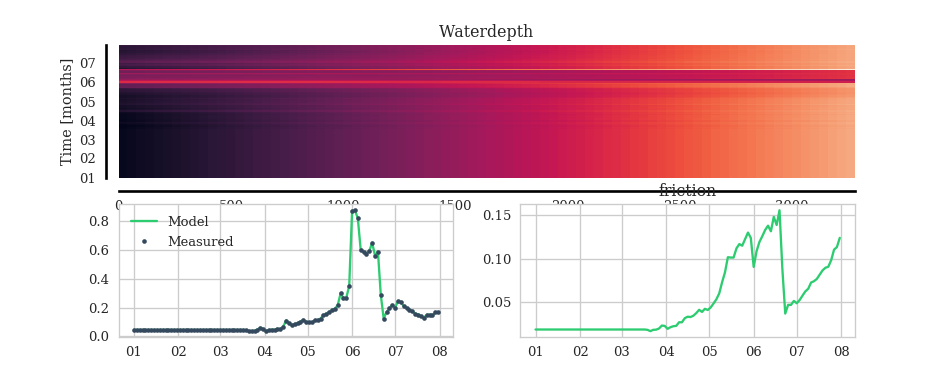

2018-04-19 16:02:10 - models.py - INFO - Figures saved to ../cases/grotebeek\output\dash_2.png


<IPython.core.display.Javascript object>


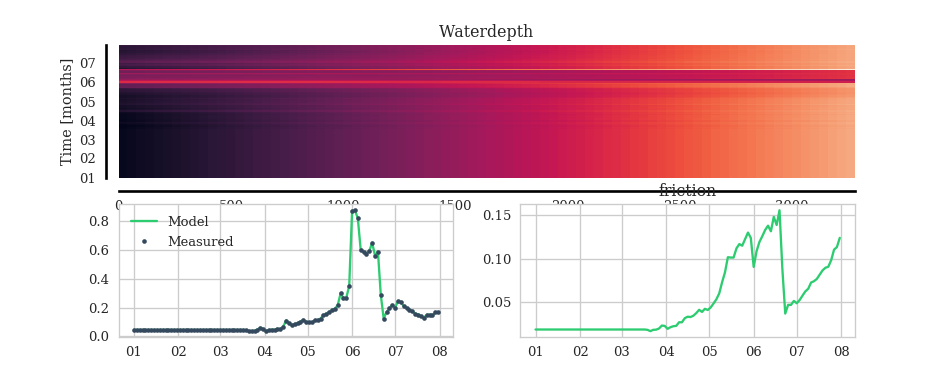

In [6]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We have calibrated the model on measurements. Can we learn more from the roughness values? We can compare to litarature blockage

<IPython.core.display.Javascript object>


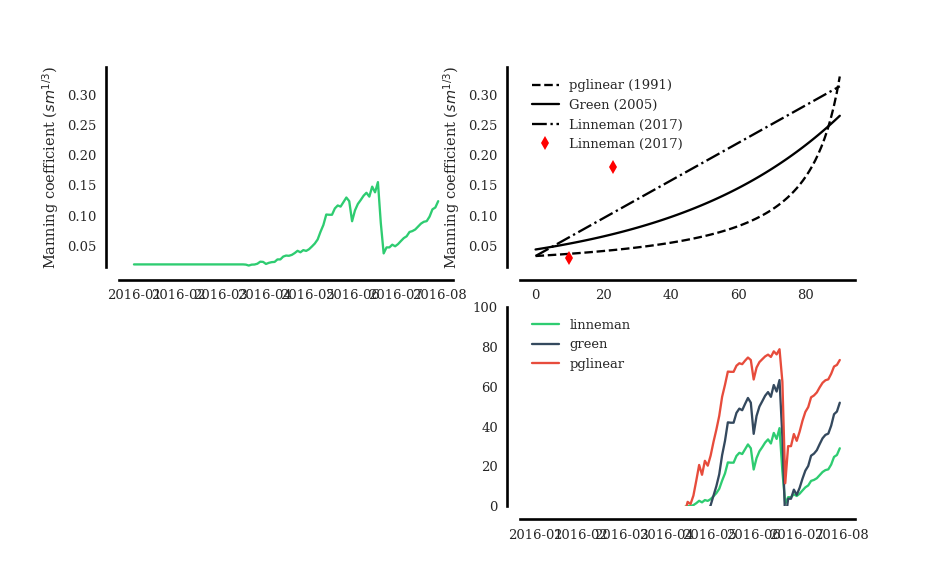

In [7]:
tools.blockage_analysis(deltabeek)